# Zomato Restaurant Project
### Problem Statement:
Zomato Data Analysis is one of the most useful analysis for foodies who want to taste the best
cuisines of every part of the world which lies in their budget. This analysis is also for those who
want to find the value for money restaurants in various parts of the country for the cuisines.
Additionally, this analysis caters the needs of people who are striving to get the best cuisine of
the country and which locality of that country serves that cuisines with maximum number of
restaurants.

### Data Storage:
This problem statement contains two datasets- Zomato.csv and country_code.csv.
Country_code.csv contains two variables:
 Country code
 Country name
The collected data has been stored in the Comma Separated Value file Zomato.csv. Each
restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the
### Following variables:
   - Restaurant Id: Unique id of every restaurant across various cities of the world
   - Restaurant Name: Name of the restaurant
   - Country Code: Country in which restaurant is located
   - City: City in which restaurant is located
   - Address: Address of the restaurant
   - Locality: Location in the city
   - Locality Verbose: Detailed description of the locality
   - Longitude: Longitude coordinate of the restaurant&#39;s location
   - Latitude: Latitude coordinate of the restaurant&#39;s location
   - Cuisines: Cuisines offered by the restaurant
   - Average Cost for two: Cost for two people in different currencies ��
   - Currency: Currency of the country
   - Has Table booking: yes/no
   - Has Online delivery: yes/ no
   - Is delivering: yes/ no
   - Switch to order menu: yes/no
   - Price range: range of price of food
   - Aggregate Rating: Average rating out of 5
   - Rating color: depending upon the average rating color
   - Rating text: text on the basis of rating of rating
   - Votes: Number of ratings casted by people

### Problem statement : In this dataset predict 2 things –
1. Average Cost for two
2. Price range

Hint : Use pandas merge operation -- pd.merge (df1,df2) to combine two datasets
Downlaod Files:

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pylab import rcParams  # for plotting box plot, to check outliers
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler  # for scaling

In [2]:
# For handling outliers
# importing required libraries
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import zscore

In [3]:
# For machine learning and finding 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [4]:
#model developemnt libraries
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [5]:
pd.pandas.set_option('display.max_columns',None)  # To display all columns
pd.pandas.set_option('display.max_rows',None)  # To display all columns


### Reading Data Frame

In [6]:
df_ds = pd.read_csv('zomato.csv', encoding="ISO-8859-1")
df_cc = pd.read_excel('Country-Code.xlsx')

In [7]:
df_ds.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  Average Cost for two          Currency  \
0  French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                    Japanese                  1200  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   

  Rating text  Votes  
0   Excellent    314  
1   Excellent    591

In [8]:
df_cc.head(2)

Country Code    Country
0             1      India
1            14  Australia

In [9]:
# As both data sets having one common column, i.e. Country Code. We can merge these columns into one.
df = df_ds.merge(df_cc, left_on='Country Code', right_on='Country Code')

In [10]:
df.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines  
2   Very Good    270  Phillipines  
3   Excellent    365  Phillipines  
4   Excellent    229  Phillipines

In [11]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [12]:
# As we have replaced country code with country name
df.drop('Country Code', axis=1, inplace=True)

In [13]:
df.head()

Restaurant ID         Restaurant Name              City  \
0        6317637        Le Petit Souffle       Makati City   
1        6304287        Izakaya Kikufuji       Makati City   
2        6300002  Heat - Edsa Shangri-La  Mandaluyong City   
3        6318506                    Ooma  Mandaluyong City   
4        6314302             Sambo Kojin  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines  
2   Very Good    270  Phillipines  
3   Excellent    365  Phillipines  
4   Excellent    229  Phillipines

##  Understanding the data

In [14]:
df.head()

Restaurant ID         Restaurant Name              City  \
0        6317637        Le Petit Souffle       Makati City   
1        6304287        Izakaya Kikufuji       Makati City   
2        6300002  Heat - Edsa Shangri-La  Mandaluyong City   
3        6318506                    Ooma  Mandaluyong City   
4        6314302             Sambo Kojin  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  Average Cost for two          Currency  \
0        French, Japanese, Desserts                  1100  Botswana Pula(P)   
1                          Japanese                  1200  Botswana Pula(P)   
2  Seafood, Asian, Filipino, Indian                  4000  Botswana Pula(P)   
3                   Japanese, Sushi                  1500  Botswana Pula(P)   
4                  Japanese, Korean                  1500  Botswana Pula(P)   

  Has Table booking Has Online delivery Is delivering now  \
0               Yes                  No                No   
1               Yes                  No                No   
2               Yes                  No                No   
3                No                  No                No   
4               Yes                  No                No   

  Switch to order menu  Price range  Aggregate rating Rating color  \
0                   No            3               4.8   Dark Green   
1                   No            3               4.5   Dark Green   
2                   No            4               4.4        Green   
3                   No            4               4.9   Dark Green   
4                   No            4               4.8   Dark Green   

  Rating text  Votes      Country  
0   Excellent    314  Phillipines  
1   Excellent    591  Phillipines  
2   Very Good    270  Phillipines  
3   Excellent    365  Phillipines  
4   Excellent    229  Phillipines

In [15]:
df.tail()

Restaurant ID           Restaurant Name       City  \
9546        5915730              NamlÛ± Gurme  ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±  ÛÁstanbul   
9548        5915807                     Huqqa  ÛÁstanbul   
9549        5916112              Aôôk Kahve  ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery  ÛÁstanbul   

                                                Address     Locality  \
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...     Karakí_y   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...    Koôuyolu   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...  Kuruí_eôme   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...  Kuruí_eôme   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...         Moda   

            Locality Verbose  Longitude   Latitude  \
9546     Karakí_y, ÛÁstanbul  28.977392  41.022793   
9547    Koôuyolu, ÛÁstanbul  29.041297  41.009847   
9548  Kuruí_eôme, ÛÁstanbul  29.034640  41.055817   
9549  Kuruí_eôme, ÛÁstanbul  29.036019  41.057979   
9550         Moda, ÛÁstanbul  29.026016  40.984776   

                             Cuisines  Average Cost for two          Currency  \
9546                          Turkish                    80  Turkish Lira(TL)   
9547  World Cuisine, Patisserie, Cafe                   105  Turkish Lira(TL)   
9548           Italian, World Cuisine                   170  Turkish Lira(TL)   
9549                  Restaurant Cafe                   120  Turkish Lira(TL)   
9550                             Cafe                    55  Turkish Lira(TL)   

     Has Table booking Has Online delivery Is delivering now  \
9546                No                  No                No   
9547                No                  No                No   
9548                No                  No                No   
9549                No                  No                No   
9550                No                  No                No   

     Switch to order menu  Price range  Aggregate rating Rating color  \
9546                   No            3               4.1        Green   
9547                   No            3               4.2        Green   
9548                   No            4               3.7       Yellow   
9549                   No            4               4.0        Green   
9550                   No            2               4.0        Green   

     Rating text  Votes Country  
9546   Very Good    788  Turkey  
9547   Very Good   1034  Turkey  
9548        Good    661  Turkey  
9549   Very Good    901  Turkey  
9550   Very Good    591  Turkey

In [16]:
df.sample(10)

Restaurant ID        Restaurant Name       City  \
8588       18275704                Burnout      Noida   
4411         309533            Just Kababs  New Delhi   
8544       18472682  Maharba Chicken Point      Noida   
2078       18368007         Little Skillet    Gurgaon   
2691       18258778   34, Chowringhee Lane  New Delhi   
6988       18460981        Peri Peri Momos  New Delhi   
3976         307490      Summer House Cafe  New Delhi   
5881           5368               Hot Spot  New Delhi   
8452         309098         Popular Cakery      Noida   
8017       18479000            Shri Balaji  New Delhi   

                                                Address              Locality  \
8588                  Location Varies, Sector 37, Noida             Sector 37   
4411  Shop 9, Aravali Shopping Centre, Kalkaji, New ...               Kalkaji   
8544  Brahmputra Market, Near Juice Corner, Sector 2...             Sector 29   
2078  Shop 5, Sapphire complex, Sector 49, Near Sohn...            Sohna Road   
2691  115, Central Market, Ashok Vihar Phase 1, New ...   Ashok Vihar Phase 1   
6988    57, Satya Niketan Road, Satyaniketan, New Delhi          Satyaniketan   
3976  1st Floor, DDA Shopping Complex, Aurobindo Pla...             Hauz Khas   
5881  G-49, Aggarwal Millenium, Tower 1, Netaji Subh...  Netaji Subhash Place   
8452  BK-1, Near Sector 18, Metro Station, Sector 18...             Sector 18   
8017  Near Gate 1, Green Park Metro Station, Yusuf S...           Yusuf Sarai   

                     Locality Verbose  Longitude   Latitude  \
8588                 Sector 37, Noida  77.375657  28.529984   
4411               Kalkaji, New Delhi  77.253128  28.532831   
8544                 Sector 29, Noida  77.332751  28.569734   
2078              Sohna Road, Gurgaon  77.048936  28.412039   
2691   Ashok Vihar Phase 1, New Delhi  77.172916  28.693327   
6988          Satyaniketan, New Delhi  77.168544  28.587657   
3976             Hauz Khas, New Delhi  77.203809  28.552520   
5881  Netaji Subhash Place, New Delhi  77.149640  28.693780   
8452                 Sector 18, Noida  77.324998  28.569788   
8017           Yusuf Sarai, New Delhi  77.207383  28.559824   

                                Cuisines  Average Cost for two  \
8588       Continental, Mexican, Italian                   450   
4411             Fast Food, North Indian                   250   
8544               North Indian, Mughlai                   300   
2078    North Indian, Chinese, Fast Food                   500   
2691                           Fast Food                   350   
6988                  Chinese, Fast Food                   300   
3976                Italian, Continental                  1850   
5881  Fast Food, North Indian, Beverages                   400   
8452         Bakery, Desserts, Fast Food                   500   
8017                        South Indian                   200   

                Currency Has Table booking Has Online delivery  \
8588  Indian Rupees(Rs.)                No                 Yes   
4411  Indian Rupees(Rs.)                No                  No   
8544  Indian Rupees(Rs.)                No                  No   
2078  Indian Rupees(Rs.)                No                  No   
2691  Indian Rupees(Rs.)                No                 Yes   
6988  Indian Rupees(Rs.)                No                  No   
3976  Indian Rupees(Rs.)               Yes                  No   
5881  Indian Rupees(Rs.)                No                  No   
8452  Indian Rupees(Rs.)                No                 Yes   
8017  Indian Rupees(Rs.)                No                  No   

     Is delivering now Switch to order menu  Price range  Aggregate rating  \
8588                No                   No            1               3.6   
4411                No                   No            1               3.4   
8544                No                   No            1               0.0   
2078                No    

In [17]:
df.dtypes

Restaurant ID             int64
Restaurant Name          object
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
Country                  object
dtype: object

In [18]:
df.shape

(9551, 21)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   City                  9551 non-null   object 
 3   Address               9551 non-null   object 
 4   Locality              9551 non-null   object 
 5   Locality Verbose      9551 non-null   object 
 6   Longitude             9551 non-null   float64
 7   Latitude              9551 non-null   float64
 8   Cuisines              9542 non-null   object 
 9   Average Cost for two  9551 non-null   int64  
 10  Currency              9551 non-null   object 
 11  Has Table booking     9551 non-null   object 
 12  Has Online delivery   9551 non-null   object 
 13  Is delivering now     9551 non-null   object 
 14  Switch to order menu  9551 non-null   object 
 15  Price range          

In [20]:
df['City'].value_counts()

New Delhi                 5473
Gurgaon                   1118
Noida                     1080
Faridabad                  251
Ghaziabad                   25
Bhubaneshwar                21
Guwahati                    21
Amritsar                    21
Lucknow                     21
Ahmedabad                   21
Rio de Janeiro              20
Patna                       20
Mumbai                      20
Mysore                      20
Nagpur                      20
Nashik                      20
Chennai                     20
Pretoria                    20
Puducherry                  20
Sí£o Paulo                  20
Pune                        20
Ranchi                      20
Aurangabad                  20
Surat                       20
Vadodara                    20
Varanasi                    20
Mangalore                   20
Ludhiana                    20
Colombo                     20
Kolkata                     20
Kochi                       20
Kanpur                      20
Jaipur  

### Observation - 
- Restaurant Id: Unique id of every restaurant across various cities of the world
- Restaurant Name: Name of the restaurant
- Country Code: Country in which restaurant is located
- City: City in which restaurant is located
- Address: Address of the restaurant
- Locality: Location in the city
- Locality Verbose: Detailed description of the locality
- Longitude: Longitude coordinate of the restaurant's location
- Latitude: Latitude coordinate of the restaurant's location
- Cuisines: Cuisines offered by the restaurant
- Average Cost for two: Cost for two people in different currencies ��
- Currency: Currency of the country
- Has Table booking: yes/no
- Has Online delivery: yes/ no
- Is delivering: yes/ no
- Switch to order menu: yes/no
- Price range: range of price of food
- Aggregate Rating: Average rating out of 5
- Rating color: depending upon the average rating color
- Rating text: text on the basis of rating of rating
- Votes: Number of ratings casted by people

## Exploring five number summery of data

In [21]:
df.describe()

Restaurant ID    Longitude     Latitude  Average Cost for two  \
count   9.551000e+03  9551.000000  9551.000000           9551.000000   
mean    9.051128e+06    64.126574    25.854381           1199.210763   
std     8.791521e+06    41.467058    11.007935          16121.183073   
min     5.300000e+01  -157.948486   -41.330428              0.000000   
25%     3.019625e+05    77.081343    28.478713            250.000000   
50%     6.004089e+06    77.191964    28.570469            400.000000   
75%     1.835229e+07    77.282006    28.642758            700.000000   
max     1.850065e+07   174.832089    55.976980         800000.000000   

       Price range  Aggregate rating         Votes  
count  9551.000000       9551.000000   9551.000000  
mean      1.804837          2.666370    156.909748  
std       0.905609          1.516378    430.169145  
min       1.000000          0.000000      0.000000  
25%       1.000000          2.500000      5.000000  
50%       2.000000          3.200000     31.000000  
75%       2.000000          3.700000    131.000000  
max       4.000000          4.900000  10934.000000

In [22]:
df.describe(include='O')

Restaurant Name       City           Address         Locality  \
count              9551       9551              9551             9551   
unique             7446        141              8918             1208   
top     Cafe Coffee Day  New Delhi  Sector 41, Noida  Connaught Place   
freq                 83       5473                11              122   

                  Locality Verbose      Cuisines            Currency  \
count                         9551          9542                9551   
unique                        1265          1825                  12   
top     Connaught Place, New Delhi  North Indian  Indian Rupees(Rs.)   
freq                           122           936                8652   

       Has Table booking Has Online delivery Is delivering now  \
count               9551                9551              9551   
unique                 2                   2                 2   
top                   No                  No                No   
freq                8393                7100              9517   

       Switch to order menu Rating color Rating text Country  
count                  9551         9551        9551    9551  
unique                    1            6           6      15  
top                      No       Orange     Average   India  
freq                   9551         3737        3737    8652

### Data Analysis

In [23]:
# checking null values
print('Total Number of missing values in data set are', df.isnull().sum().sum())

Total Number of missing values in data set are 9


In [24]:
df.isnull().sum().sum()

9

In [25]:
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df.columns if df[features].isnull().sum()>1]


## 2- step print the feature name and the percentage of missing values
for feature in features_with_na:
    print(feature, np.round(df[feature].isnull().mean(), 4), ' % missing values')

print('\n\n\n')
for feature in features_with_na:
    print(f'Out of {df[feature].size}, {feature} has \033[1m {df[feature].isnull().sum()} \033[0;0m missing values.')

Cuisines 0.0009  % missing values




Out of 9551, Cuisines has  9  missing values.


In [26]:
# It is better to drop missing values
df.dropna(inplace=True)

In [27]:
# Removing duplicate values
df.duplicated().sum()

0

### Observations -
There are no duplicates in column.

In [28]:
# list of numerical variables
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
df[numerical_features].head()

Number of numerical variables:  7


Restaurant ID   Longitude   Latitude  Average Cost for two  Price range  \
0        6317637  121.027535  14.565443                  1100            3   
1        6304287  121.014101  14.553708                  1200            3   
2        6300002  121.056831  14.581404                  4000            4   
3        6318506  121.056475  14.585318                  1500            4   
4        6314302  121.057508  14.584450                  1500            4   

   Aggregate rating  Votes  
0               4.8    314  
1               4.5    591  
2               4.4    270  
3               4.9    365  
4               4.8    229

In [29]:
df.describe

<bound method NDFrame.describe of       Restaurant ID                                    Restaurant Name  \
0           6317637                                   Le Petit Souffle   
1           6304287                                   Izakaya Kikufuji   
2           6300002                             Heat - Edsa Shangri-La   
3           6318506                                               Ooma   
4           6314302                                        Sambo Kojin   
5          18189371                                       Din Tai Fung   
6           6300781                                         Buffet 101   
7           6301290                                            Vikings   
8           6300010           Spiral - Sofitel Philippine Plaza Manila   
9           6314987                                           Locavore   
10          6309903                                   Silantro Fil-Mex   
11          6309455                    Mad Mark's Creamery & Good Eats   
12  

## Plotting

In [30]:
country_names=df.Country.value_counts().index

In [31]:
country_val=df.Country.value_counts().values

([<matplotlib.patches.Wedge at 0x2ae8d8bae50>,
 [Text(-1.083531565863807, 0.189629496061996, 'India'),
  Text(1.0779194567879458, -0.21929351262173782, 'United States'),
  Text(1.0995857034695016, -0.03018742661244155, 'United Kingdom')],
 [Text(-0.5910172177438947, 0.10343427057927053, '94.49%'),
  Text(0.5879560673388794, -0.1196146432482206, '4.64%'),
  Text(0.5997740200742735, -0.016465869061331753, '0.87%')])

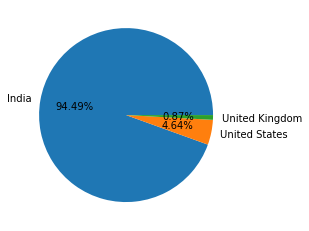

In [32]:
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')

In [33]:
ratings=df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

### Observation¶
- Rating is between 4.5 to 4.9----> Excellent
- Rating is between 4.0 to 3.4----> very good
- Rating is between 3.5 to 3.9----> good
- Rating is between 3.0 to 3.4----> average
- Rating is between 2.5 to 2.9----> average
- Rating is between 2.0 to 2.4----> Poor

<AxesSubplot:xlabel='Aggregate rating', ylabel='Rating Count'>

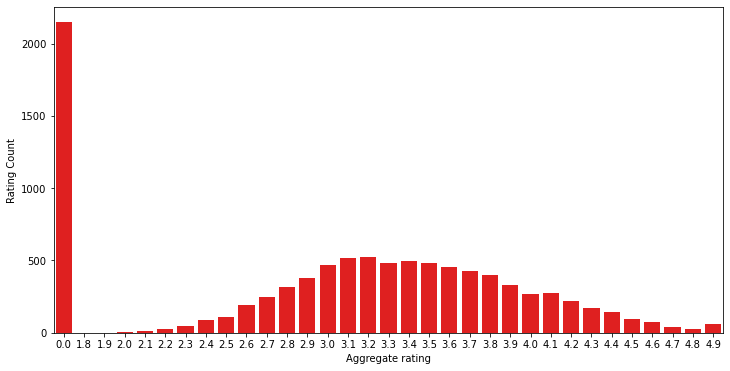

In [34]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 6)
sns.barplot(x="Aggregate rating",y="Rating Count",data=ratings, color='r')

### Observation
- From above, it is clear that there are lots of entries with no ratings at all.
- Countable ratings start from 2.2 to 4.7 range

<AxesSubplot:xlabel='Rating color', ylabel='count'>

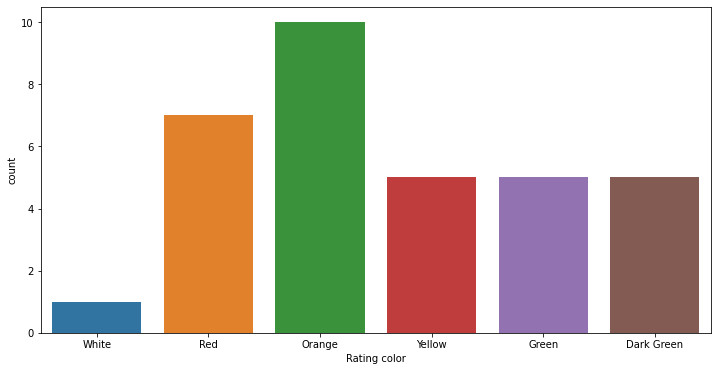

In [35]:
# count plot
sns.countplot(x='Rating color',data=ratings)

In [36]:
# countries with high 0 rating
df[df['Rating color']=='White'].groupby('Country').size().reset_index()

Country     0
0          Brazil     5
1           India  2139
2  United Kingdom     1
3   United States     3

### Observation 
- It is clear that, more missing ratings are from India.

In [37]:
df.groupby(['Country']).size().reset_index()

Country     0
0        Australia    24
1           Brazil    60
2           Canada     4
3            India  8652
4        Indonesia    21
5      New Zealand    40
6      Phillipines    22
7            Qatar    20
8        Singapore    20
9     South Africa    60
10       Sri Lanka    20
11          Turkey    34
12             UAE    60
13  United Kingdom    80
14   United States   425

In [38]:
df[df['Has Online delivery']=='Yes'].Country.value_counts()

India    2423
UAE        28
Name: Country, dtype: int64

In [39]:
df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index()

Has Online delivery         Country     0
0                   No       Australia    24
1                   No          Brazil    60
2                   No          Canada     4
3                   No           India  6229
4                   No       Indonesia    21
5                   No     New Zealand    40
6                   No     Phillipines    22
7                   No           Qatar    20
8                   No       Singapore    20
9                   No    South Africa    60
10                  No       Sri Lanka    20
11                  No          Turkey    34
12                  No             UAE    32
13                  No  United Kingdom    80
14                  No   United States   425
15                 Yes           India  2423
16                 Yes             UAE    28

<AxesSubplot:xlabel='Is delivering now', ylabel='count'>

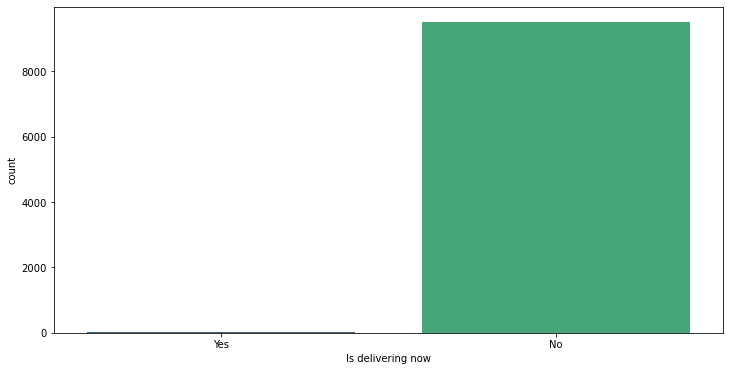

In [40]:
sns.countplot(x='Is delivering now',data=df,palette='viridis',order=['Yes','No'])

<AxesSubplot:xlabel='Has Table booking', ylabel='count'>

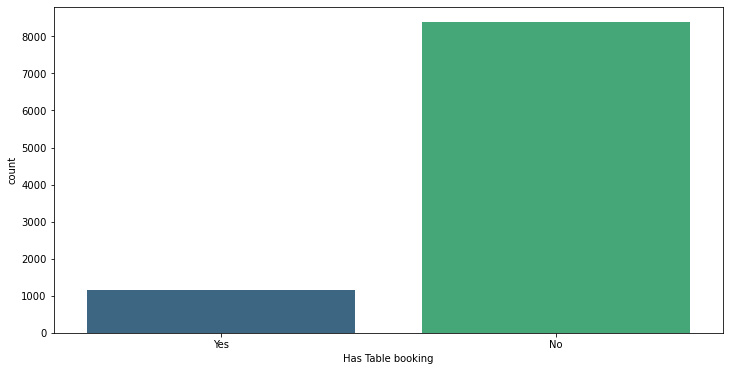

In [41]:
df['Has Table booking'].value_counts()
sns.countplot(x='Has Table booking',data=df,palette='viridis',order=['Yes','No'])

<AxesSubplot:xlabel='Has Online delivery', ylabel='count'>

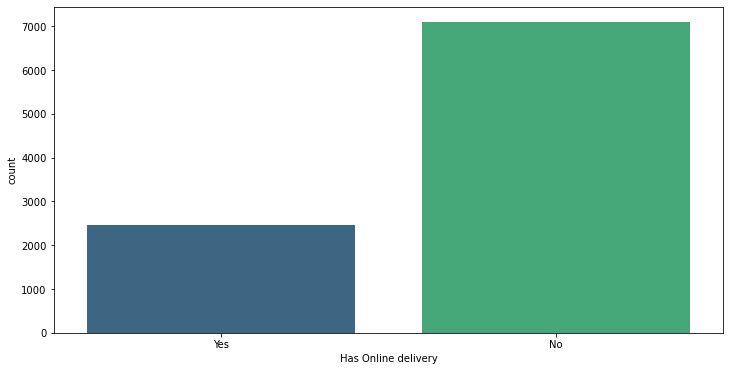

In [42]:
df['Has Online delivery'].value_counts()
sns.countplot(x='Has Online delivery',data=df,palette='viridis',order=['Yes','No'])

<AxesSubplot:xlabel='Switch to order menu', ylabel='count'>

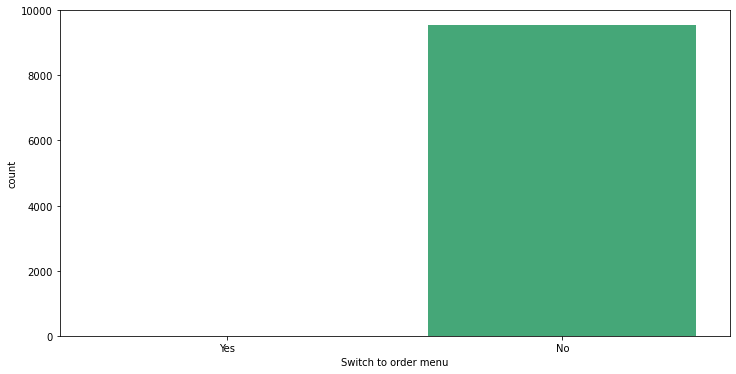

In [43]:
df['Switch to order menu'].value_counts()
sns.countplot(x='Switch to order menu',data=df,palette='viridis',order=['Yes','No'])

Average      3734
Not rated    2148
Good         2096
Very Good    1078
Excellent     300
Poor          186
Name: Rating text, dtype: int64


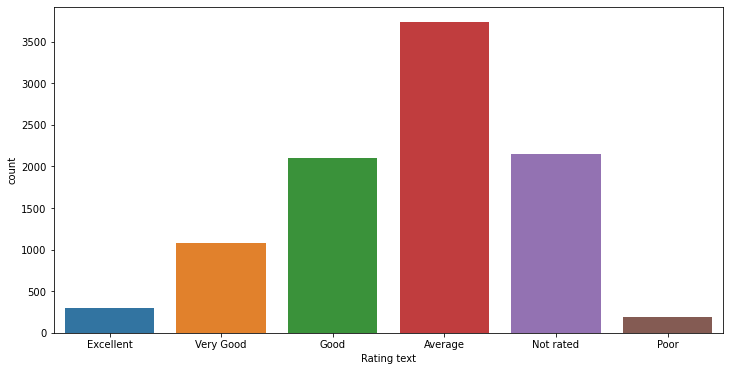

In [44]:
sns.countplot(df['Rating text'])
print(df['Rating text'].value_counts())

1    4438
2    3113
3    1405
4     586
Name: Price range, dtype: int64


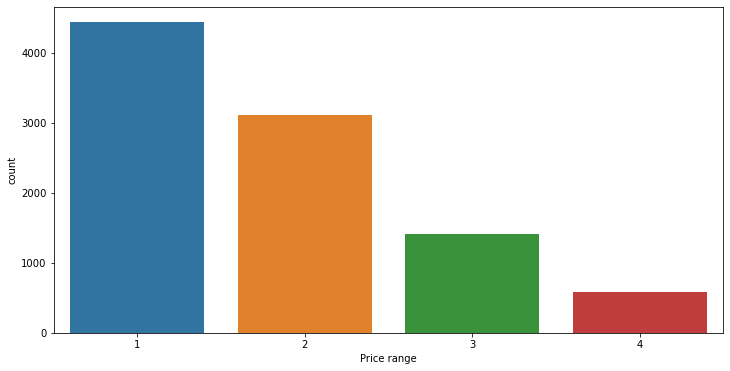

In [45]:
sns.countplot(df['Price range'])
print(df['Price range'].value_counts())

New Delhi                 5473
Gurgaon                   1118
Noida                     1080
Faridabad                  251
Ghaziabad                   25
Ahmedabad                   21
Amritsar                    21
Guwahati                    21
Bhubaneshwar                21
Lucknow                     21
Waterloo                    20
Pune                        20
Patna                       20
Puducherry                  20
Ranchi                      20
Goa                         20
Bangalore                   20
Surat                       20
Nashik                      20
Bhopal                      20
Varanasi                    20
Vizag                       20
Vadodara                    20
Mangalore                   20
Nagpur                      20
Mysore                      20
Mumbai                      20
Ludhiana                    20
Kolkata                     20
Kochi                       20
Kanpur                      20
Jaipur                      20
Indore  

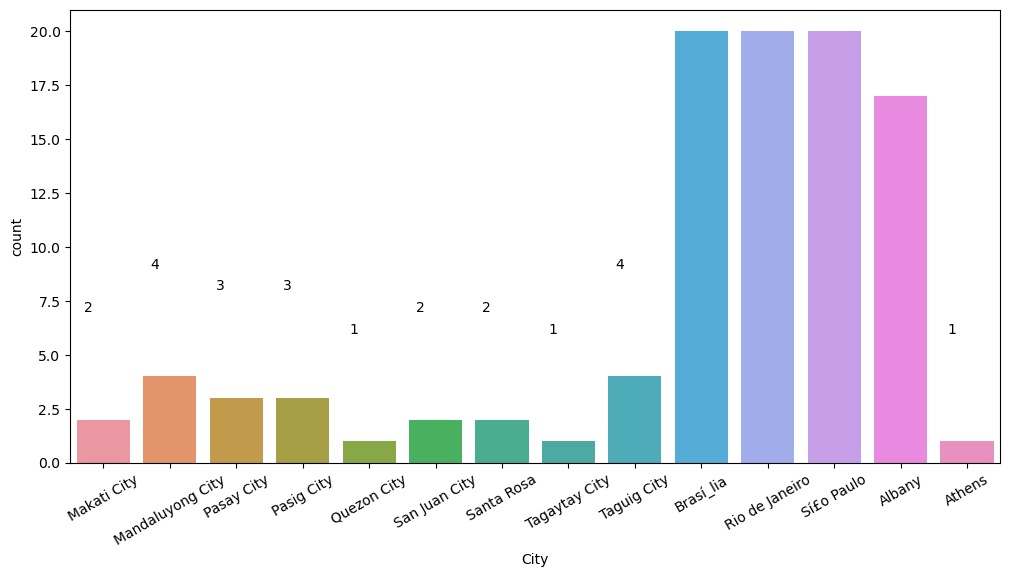

In [46]:
# Countplot for 
plt.figure(dpi=100)
plot = sns.countplot('City',data=df.head(100))
plot.set_xticklabels(plot.get_xticklabels(),rotation = 30)
print(df.City.value_counts())
for p in plot.patches:
    plot.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+5))


KeyboardInterrupt



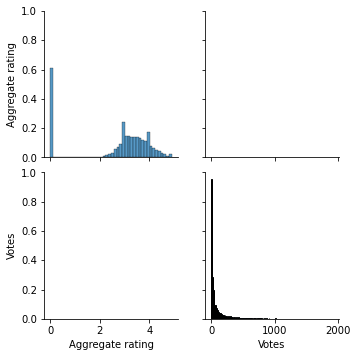

In [47]:
sns.pairplot(df[['Aggregate rating', 'Votes']])

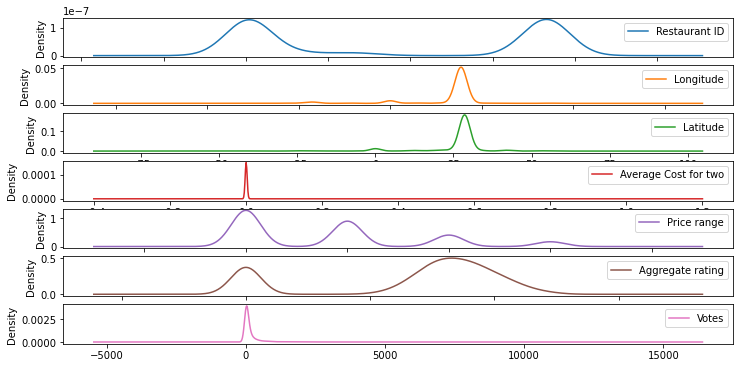

In [48]:
df.plot(kind='density',subplots=True,sharex=False)
plt.show()

<AxesSubplot:xlabel='Votes', ylabel='Density'>

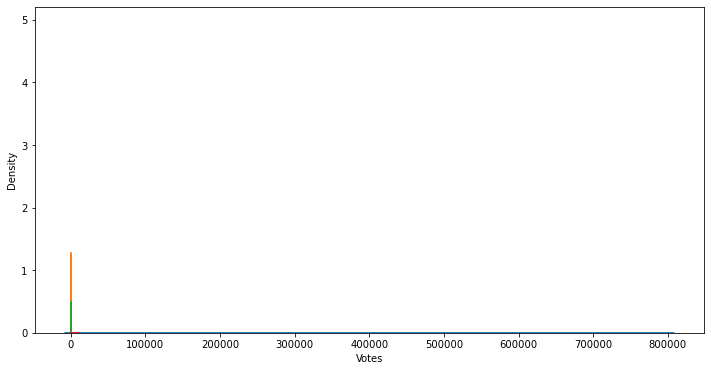

In [49]:
sns.distplot(df['Average Cost for two'])
sns.distplot(df['Price range'])
sns.distplot(df['Aggregate rating'])
sns.distplot(df['Votes'])

Restaurant ID              AxesSubplot(0.125,0.787927;0.168478x0.0920732)
Longitude               AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
Latitude                AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
Average Cost for two    AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
Price range                AxesSubplot(0.125,0.677439;0.168478x0.0920732)
Aggregate rating        AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
Votes                   AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
dtype: object

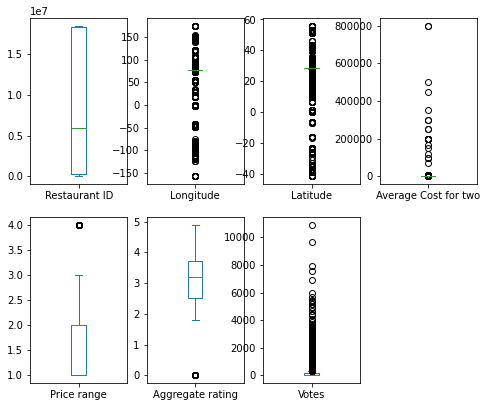

In [50]:
df.plot(kind='box',subplots=True,figsize=(8,25),layout=(7,4))
# plotting individual graph for better understanding of graph

In [51]:
cols_with_outliers = ['Average Cost for two', 'Price range', 'Aggregate rating', "Votes"]

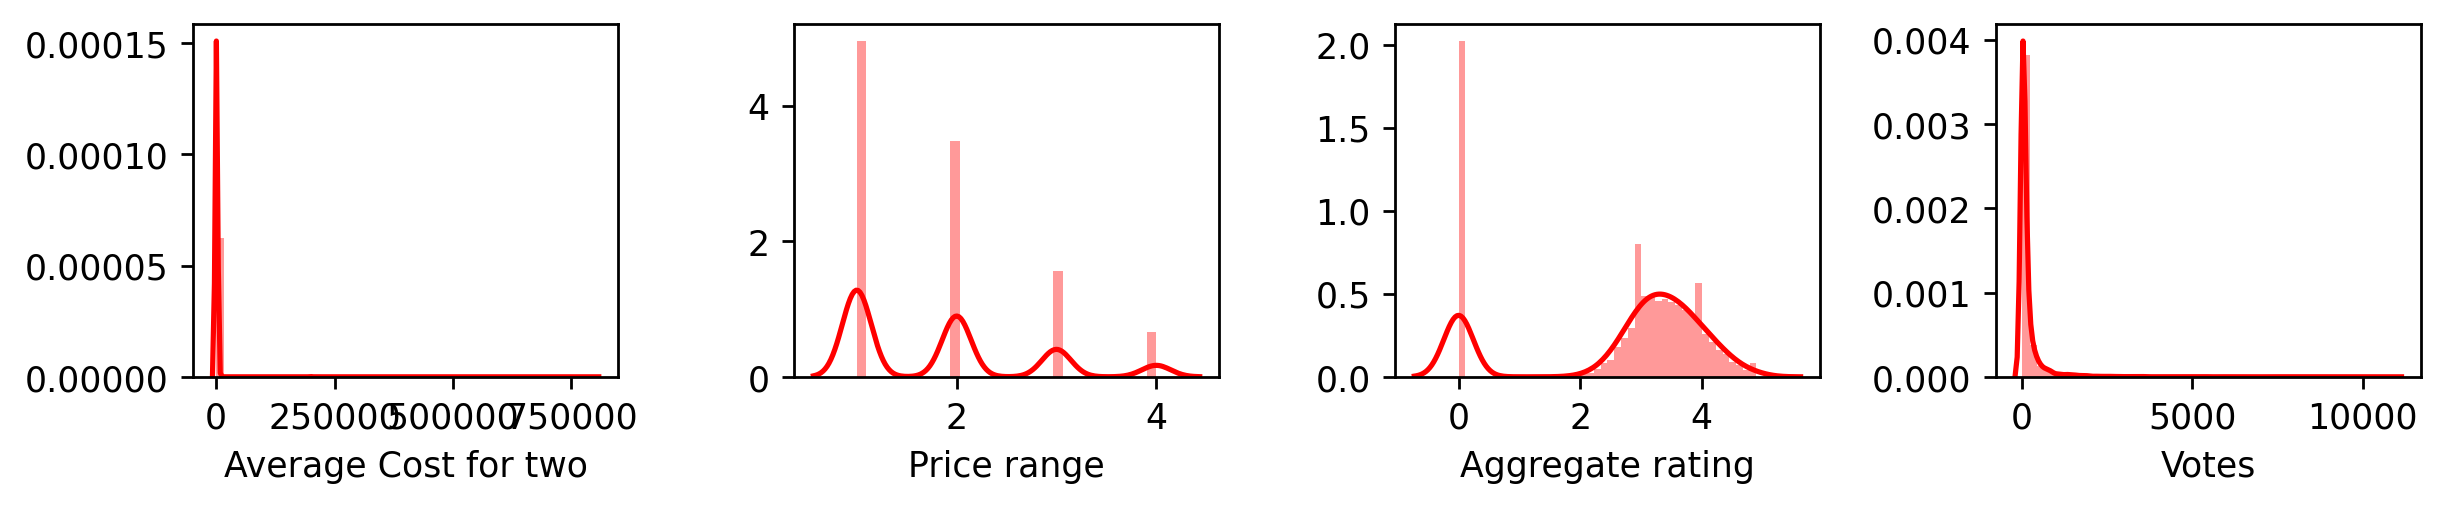

In [52]:
plt.figure(figsize = (10, 10), dpi=250)
for i in range(0, len(cols_with_outliers)):
    plt.subplot(5, 4, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.1)
plt.tight_layout(pad = 1.5)
plt.show()

In [53]:
for feature in cols_with_outliers:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    upper_bond = df[feature].quantile(0.75) + (IQR * 1.5)
    lower_bond = df[feature].quantile(0.25) - (IQR * 1.5)
    
    df[feature] = np.where(df[feature]>upper_bond,upper_bond,df[feature])
    df[feature] = np.where(df[feature]<lower_bond,lower_bond,df[feature])

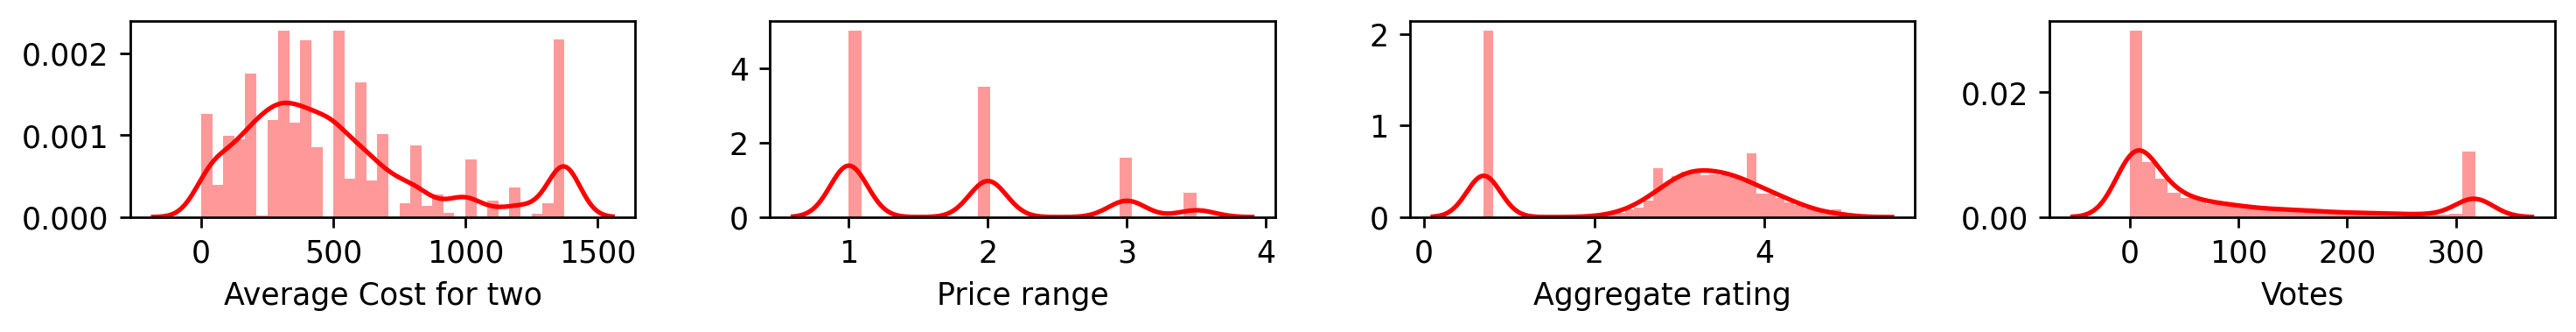

In [54]:
plt.figure(figsize = (12, 12), dpi=250)
for i in range(0, len(cols_with_outliers)):
    plt.subplot(8, 4, i+1)
    sns.distplot(df[cols_with_outliers[i]], color = 'red')
    plt.ylabel('')

# plt.suptitle('Outliers Before Cleansing', y = 0.05)
plt.tight_layout(pad = 1.5)
plt.show()

Restaurant ID              AxesSubplot(0.125,0.787927;0.168478x0.0920732)
Longitude               AxesSubplot(0.327174,0.787927;0.168478x0.0920732)
Latitude                AxesSubplot(0.529348,0.787927;0.168478x0.0920732)
Average Cost for two    AxesSubplot(0.731522,0.787927;0.168478x0.0920732)
Price range                AxesSubplot(0.125,0.677439;0.168478x0.0920732)
Aggregate rating        AxesSubplot(0.327174,0.677439;0.168478x0.0920732)
Votes                   AxesSubplot(0.529348,0.677439;0.168478x0.0920732)
dtype: object

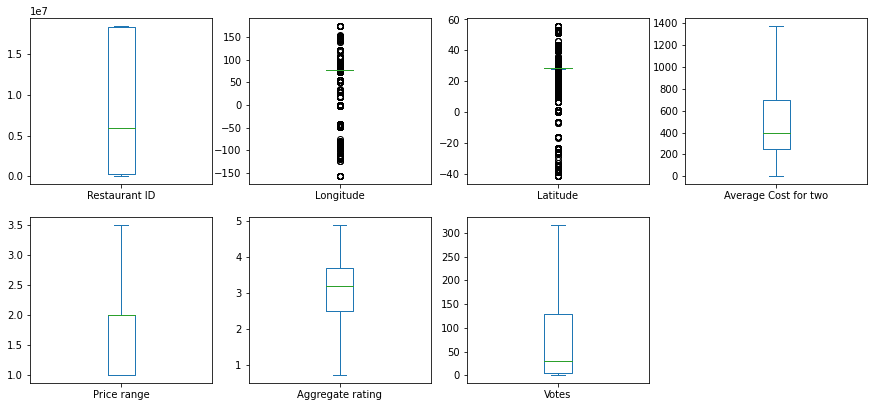

In [55]:
df.plot(kind='box',subplots=True,figsize=(15,25),layout=(7,4))
# plotting individual graph for better understanding of graph

In [56]:
df.shape

(9542, 21)

### Observation -
There are no outliers in data set.

## Checking correlation

<AxesSubplot:>

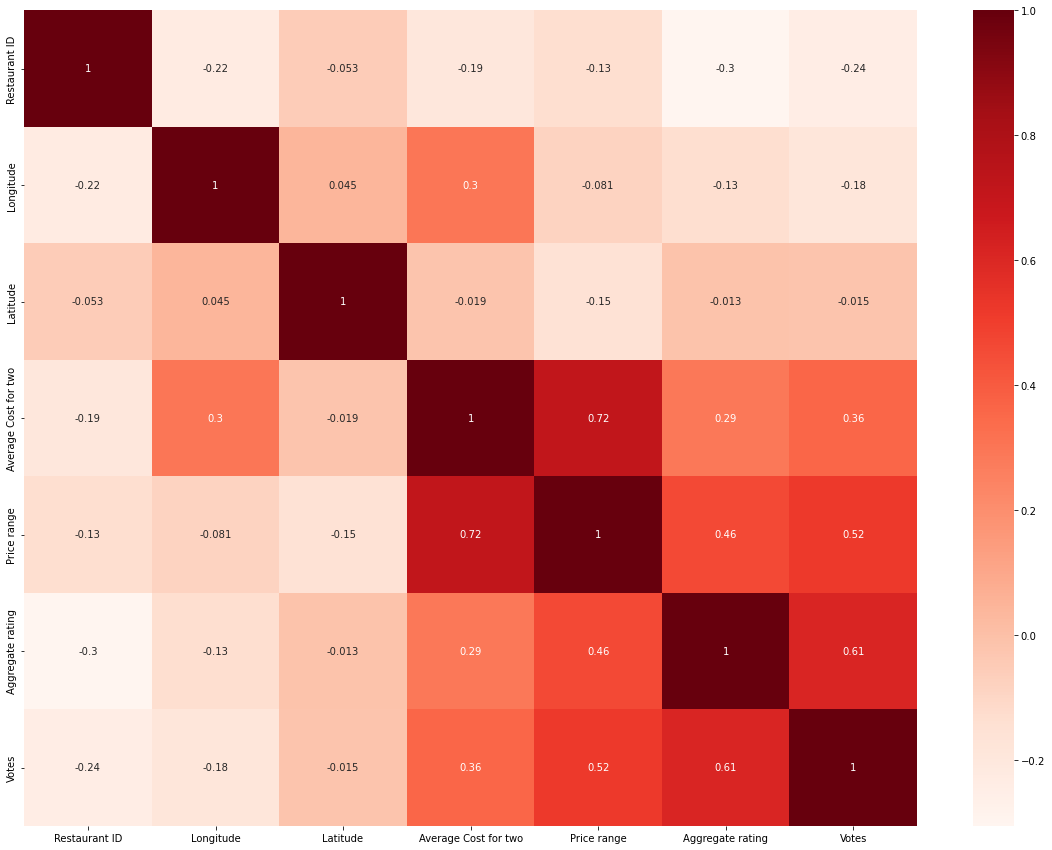

In [57]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='Reds',annot=True)

In [58]:
df.skew().sort_values()

Latitude               -3.081780
Longitude              -2.819828
Aggregate rating       -0.783333
Restaurant ID           0.063496
Price range             0.640435
Average Cost for two    0.984675
Votes                   1.222367
dtype: float64

In [59]:
#removal of skew-ness using log function
for col in numerical_features:
    if df.skew().loc[col]>0.3:
        df[col]=np.log1p(df[col])

In [60]:
df.skew().sort_values()

Latitude               -3.081780
Longitude              -2.819828
Average Cost for two   -1.470566
Aggregate rating       -0.783333
Votes                  -0.304600
Restaurant ID           0.063496
Price range             0.368117
dtype: float64

<AxesSubplot:>

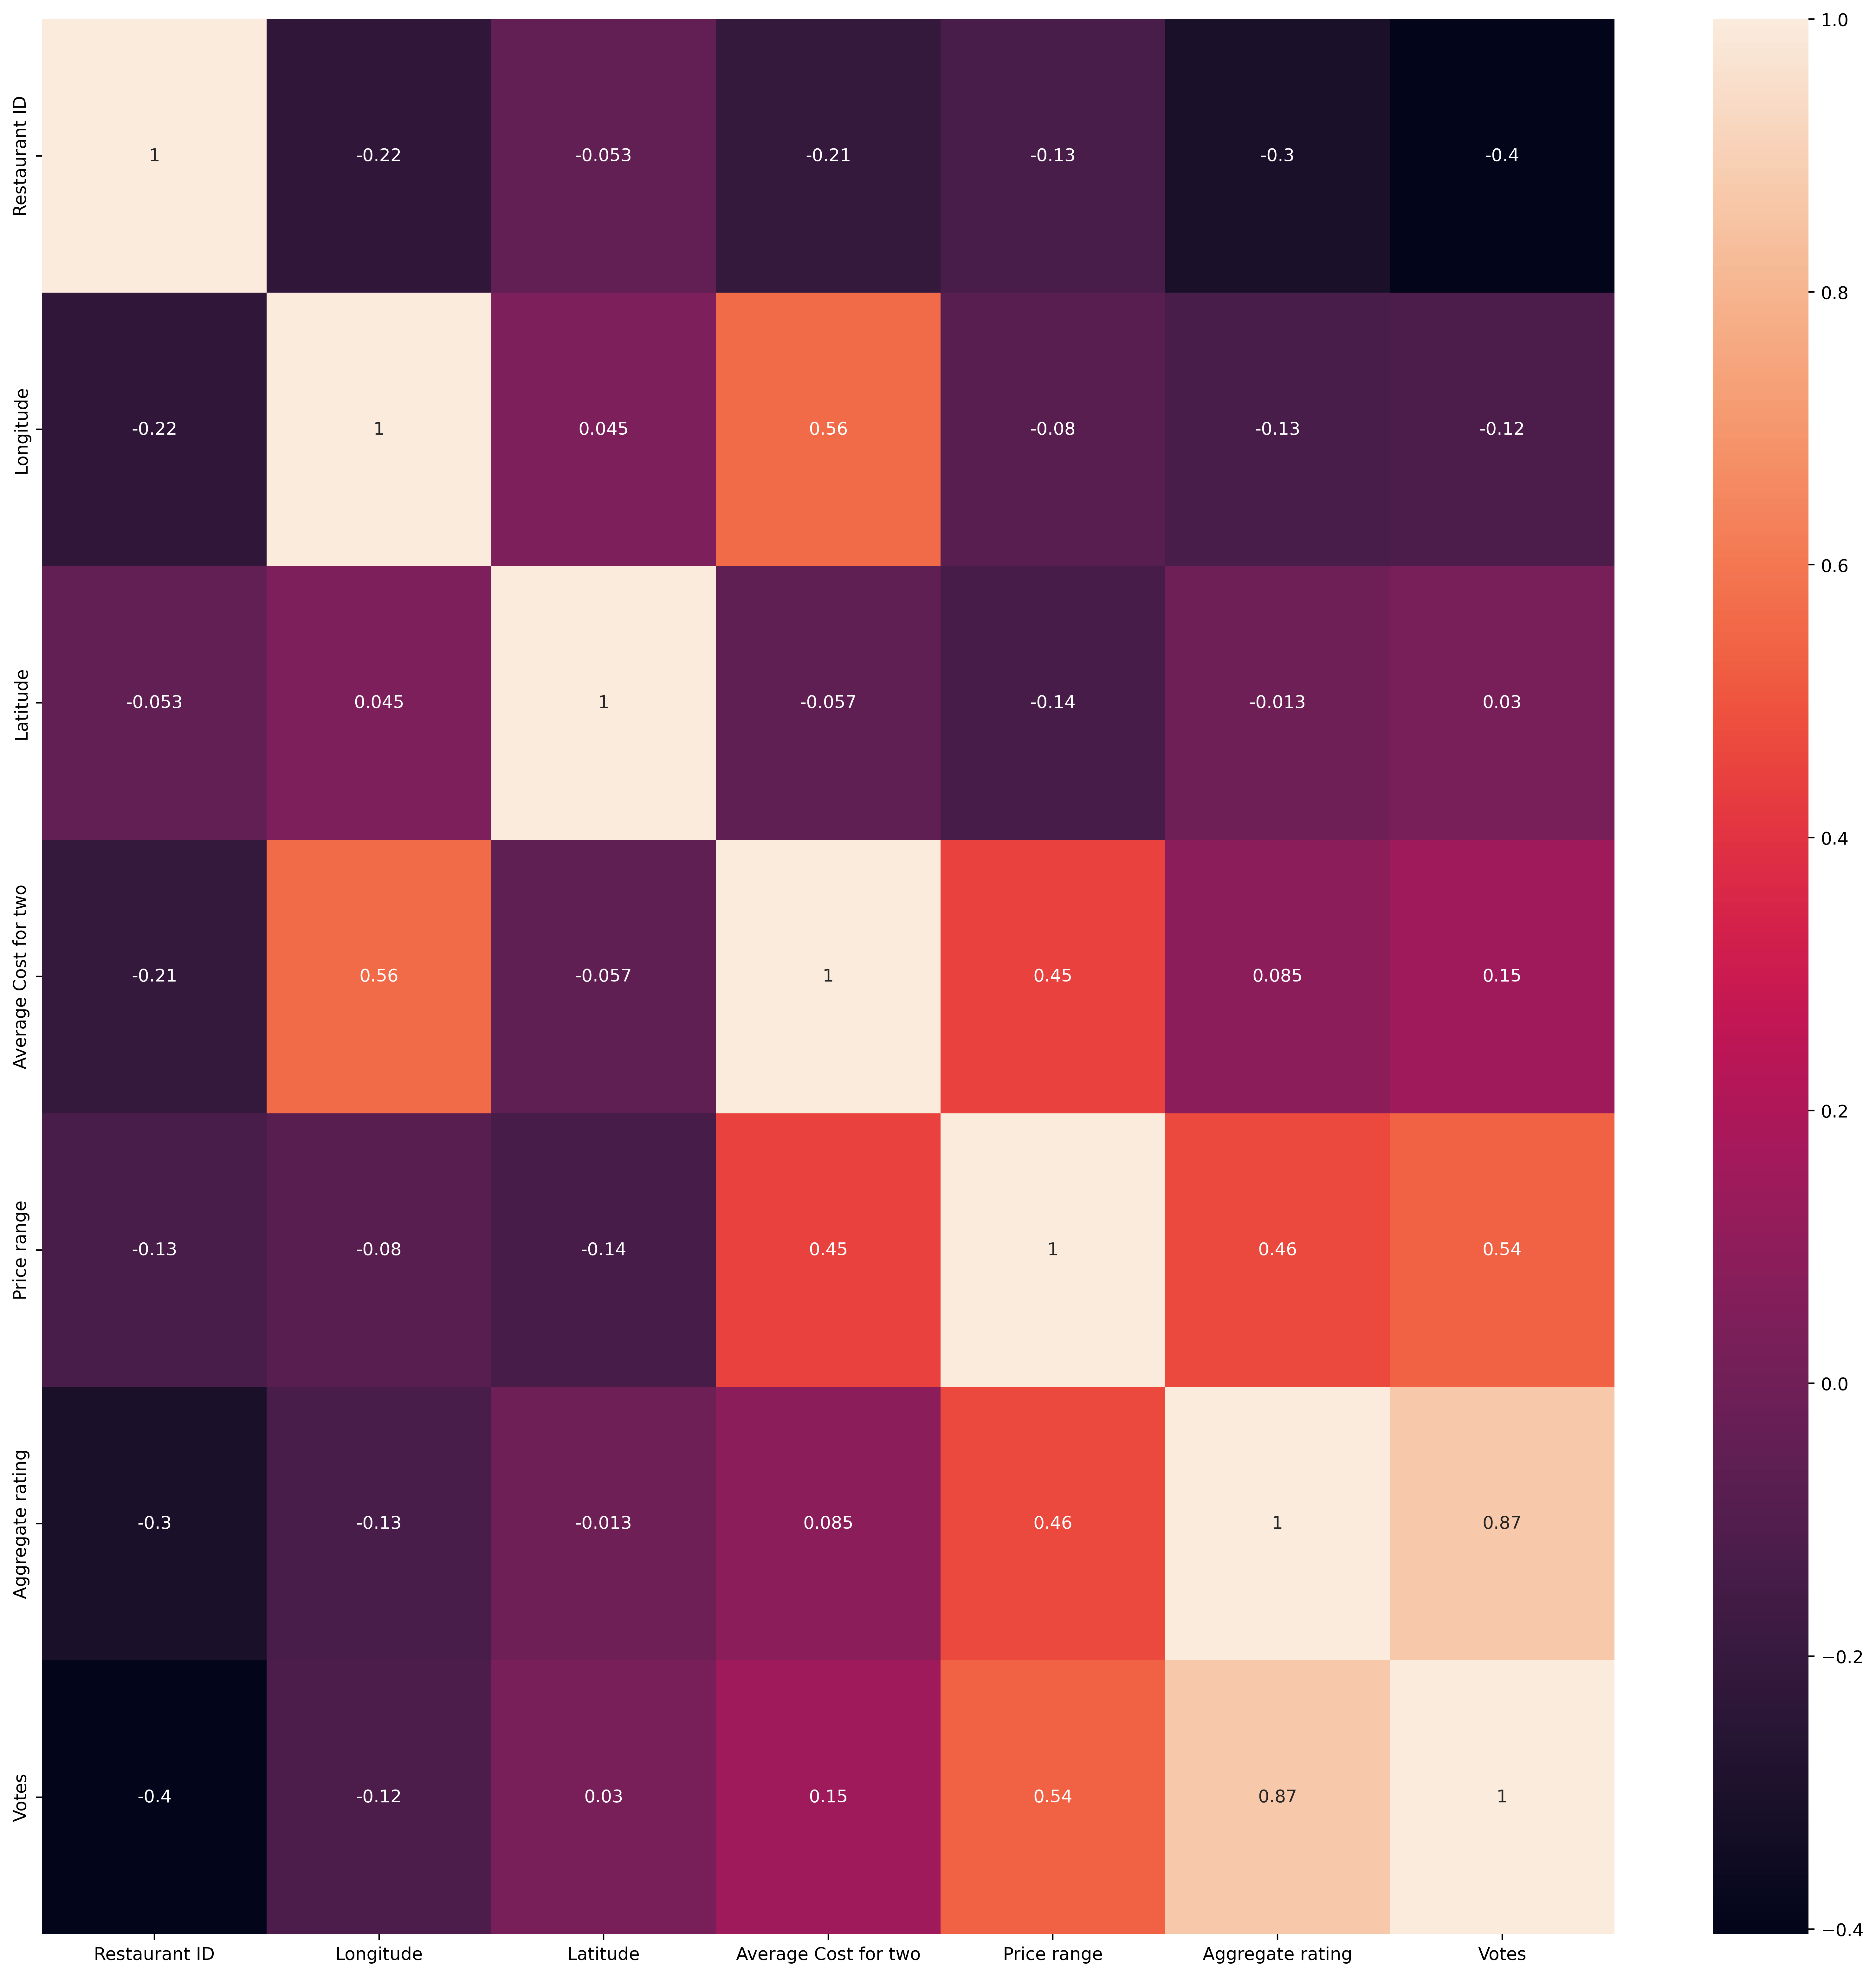

In [61]:
plt.figure(figsize=(20,20), dpi=400)
sns.heatmap(df.corr(), annot=True)

In [62]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['Restaurant Name',
 'City',
 'Address',
 'Locality',
 'Locality Verbose',
 'Cuisines',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text',
 'Country']

In [63]:
df.nunique()

Restaurant ID           9542
Restaurant Name         7437
City                     140
Address                 8910
Locality                1206
Locality Verbose        1263
Longitude               8111
Latitude                8668
Cuisines                1825
Average Cost for two      80
Currency                  12
Has Table booking          2
Has Online delivery        2
Is delivering now          2
Switch to order menu       1
Price range                4
Aggregate rating          33
Rating color               6
Rating text                6
Votes                    319
Country                   15
dtype: int64

In [64]:
df.drop('Restaurant ID', axis=1, inplace=True)
df.drop('Restaurant Name', axis=1, inplace=True)
df.drop('Address', axis=1, inplace=True)
df.drop('Locality', axis=1, inplace=True)
df.drop('Locality Verbose', axis=1, inplace=True)
df.drop('Cuisines', axis=1, inplace=True)

In [65]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorical_features

['City',
 'Currency',
 'Has Table booking',
 'Has Online delivery',
 'Is delivering now',
 'Switch to order menu',
 'Rating color',
 'Rating text',
 'Country']

In [66]:
label_=LabelEncoder()

for i in categorical_features:
    df[i]=label_.fit_transform(df[i])

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [68]:
def calc_vif(x1):
    vif=pd.DataFrame()
    vif["variables"]=x1.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return(vif)

In [69]:
df2 = df.copy()

In [70]:
y1 = df['Average Cost for two']
y2 = df2['Price range']

In [71]:
x1 = df.drop('Average Cost for two', axis=1, inplace=True)
x2 = df2.drop('Price range', axis=1, inplace=True)

In [72]:
calc_vif(df)

variables  VIF FACTOR
0                   City   10.260018
1              Longitude   11.336894
2               Latitude    8.036316
3               Currency   21.439785
4      Has Table booking    1.544169
5    Has Online delivery    1.653630
6      Is delivering now    1.016622
7   Switch to order menu         NaN
8            Price range   19.777738
9       Aggregate rating   28.537719
10          Rating color    5.359297
11           Rating text    2.623024
12                 Votes   20.097232
13               Country   10.548446

In [73]:
calc_vif(df2)

variables  VIF FACTOR
0                   City   11.733929
1              Longitude   11.425842
2               Latitude    8.406841
3   Average Cost for two   42.581759
4               Currency   26.310710
5      Has Table booking    1.377220
6    Has Online delivery    1.658429
7      Is delivering now    1.016375
8   Switch to order menu         NaN
9       Aggregate rating   29.754129
10          Rating color    5.631043
11           Rating text    2.622672
12                 Votes   19.875780
13               Country   10.680139

In [74]:
df.drop('Aggregate rating', axis=1, inplace=True)
df2.drop('Average Cost for two', axis=1, inplace=True)

In [75]:
calc_vif(df)

variables  VIF FACTOR
0                   City   10.008671
1              Longitude   11.309578
2               Latitude    8.033242
3               Currency   20.881559
4      Has Table booking    1.518286
5    Has Online delivery    1.642314
6      Is delivering now    1.016493
7   Switch to order menu         NaN
8            Price range   19.054961
9           Rating color    5.184054
10           Rating text    2.450198
11                 Votes    6.937931
12               Country   10.428256

In [76]:
calc_vif(df2)

variables  VIF FACTOR
0                   City    9.912921
1              Longitude   11.206484
2               Latitude    7.940715
3               Currency   20.105322
4      Has Table booking    1.276400
5    Has Online delivery    1.653444
6      Is delivering now    1.015610
7   Switch to order menu         NaN
8       Aggregate rating   27.494807
9           Rating color    5.272769
10           Rating text    2.532854
11                 Votes   19.859992
12               Country   10.201066

In [77]:
df2.drop('Aggregate rating', axis=1, inplace=True)
df.drop('Currency', axis=1, inplace=True)

In [78]:
calc_vif(df)

variables  VIF FACTOR
0                   City    9.699069
1              Longitude    7.405288
2               Latitude    7.973322
3      Has Table booking    1.483310
4    Has Online delivery    1.641350
5      Is delivering now    1.016491
6   Switch to order menu         NaN
7            Price range   17.459169
8           Rating color    5.087999
9            Rating text    2.446780
10                 Votes    6.903962
11               Country    8.497894

In [79]:
calc_vif(df2)

variables  VIF FACTOR
0                   City    9.521662
1              Longitude   11.149501
2               Latitude    7.940701
3               Currency   19.132796
4      Has Table booking    1.272415
5    Has Online delivery    1.642267
6      Is delivering now    1.015581
7   Switch to order menu         NaN
8           Rating color    5.136463
9            Rating text    2.399592
10                 Votes    5.491375
11               Country    9.982055

In [80]:
df2.drop('Switch to order menu', axis=1, inplace=True)
df.drop('Switch to order menu', axis=1, inplace=True)

In [81]:
numerical_features

['Restaurant ID',
 'Longitude',
 'Latitude',
 'Average Cost for two',
 'Price range',
 'Aggregate rating',
 'Votes']

In [82]:
df.shape

(9542, 11)

In [83]:
df2.shape

(9542, 11)

In [84]:
y1.shape

(9542,)

In [85]:
y2.shape

(9542,)

In [86]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for i in range(0,50):
        
        # Splitting the data Set
        X_train, X_test, y_train, y_test = train_test_split(df,y1, test_size=0.3, random_state=i)
        
        # Added for Scaling
        sc=StandardScaler()
        X_train=sc.fit_transform(X_train)
        X_test=sc.fit_transform(X_test)
        
        # Model Preparation
        md=model()
        md.fit(X_train,y_train)
        
        # Prediction and Testing Model
        predict=md.predict(X_test)
        

        
        r2score=r2_score(y_test,predict)
        rmse = mean_squared_error(y_test, predict, squared=False)
        # cv_score = (cross_val_score(md, x, y, cv=2).mean())*100
        
        
        if r2score>max_score:
            max_score=r2score
            max_state=i
            
            
    # ----------------------------------------------------------
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test, y=predict, color='g')
    plt.plot(y_test,y_test,color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(md, fontsize=18)
    plt.show()
    
    
    # -----------------------------------------------------------        
    print(f'----------------------------{model}----------------------------')        
    print("1. Maximum score of {} 2. Random_state {} 3. RMSE = {}".format(max_score,max_state, rmse))
    print("MAE",mean_absolute_error(y_test,predict))
    print("MSE",mean_squared_error(y_test,predict))

------------------------------------"" Linear Regression""------------------------------------ 


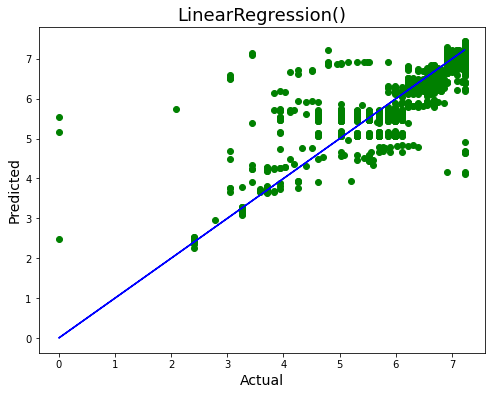

----------------------------<class 'sklearn.linear_model._base.LinearRegression'>----------------------------
1. Maximum score of 0.776824509190285 2. Random_state 22 3. RMSE = 0.5073085197819492
MAE 0.3107992836606704
MSE 0.2573619342433524
------------------------------------""Lasso""------------------------------------


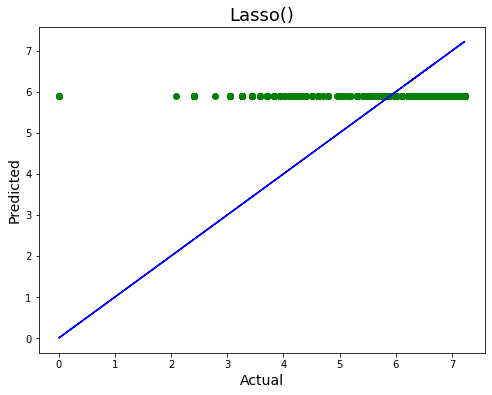

----------------------------<class 'sklearn.linear_model._coordinate_descent.Lasso'>----------------------------
1. Maximum score of 0 2. Random_state 0 3. RMSE = 0.973693657883915
MAE 0.712299040509859
MSE 0.9480793394033586
------------------------------------""Ridge""------------------------------------ 


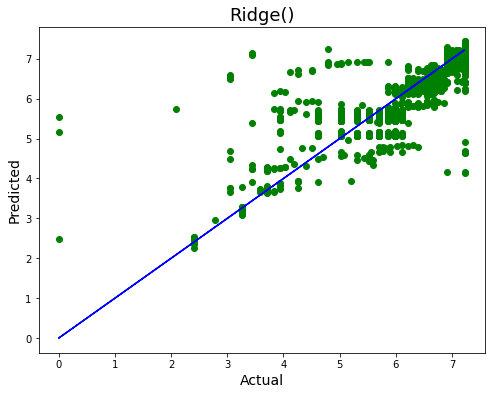

----------------------------<class 'sklearn.linear_model._ridge.Ridge'>----------------------------
1. Maximum score of 0.7768103967988333 2. Random_state 22 3. RMSE = 0.5072973254040974
MAE 0.31080063005140457
MSE 0.25735057636215075
------------------------------------""ElasticNet""------------------------------------ 


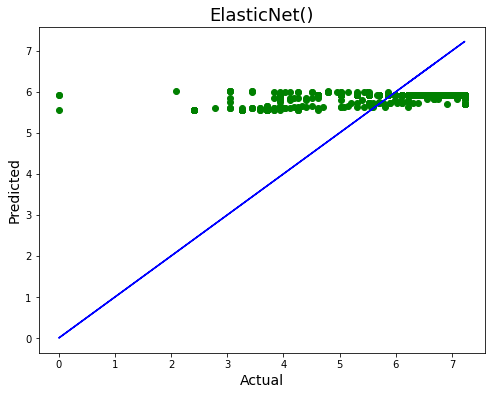

----------------------------<class 'sklearn.linear_model._coordinate_descent.ElasticNet'>----------------------------
1. Maximum score of 0.11152896707135596 2. Random_state 17 3. RMSE = 0.9248302031223266
MAE 0.6887647538054165
MSE 0.8553109046072838
------------------------------------""SVR""------------------------------------


In [ ]:
print(f'------------------------------------"\033[1m" Linear Regression"\033[0m"------------------------------------ ')
model_select(LinearRegression)
print(f'------------------------------------"\033[1m"Lasso"\033[0m"------------------------------------')
model_select(Lasso)
print(f'------------------------------------"\033[1m"Ridge"\033[0m"------------------------------------ ')
model_select(Ridge)
print(f'------------------------------------"\033[1m"ElasticNet"\033[0m"------------------------------------ ')
model_select(ElasticNet)
print(f'------------------------------------"\033[1m"SVR"\033[0m"------------------------------------')
model_select(SVR)
print(f'------------------------------------"\033[1m"DecisionTreeRegressor"\033[0m"------------------------------------')
model_select(DecisionTreeRegressor)
print(f'------------------------------------"\033[1m"RandomForestRegressor"\033[0m"------------------------------------')
model_select(RandomForestRegressor)
print(f'------------------------------------"\033[1m"KNeighborsRegressor"\033[0m"------------------------------------ ')
model_select(KNeighborsRegressor)
print(f'------------------------------------"\033[1m"SGDRegressor"\033[0m"------------------------------------')
model_select(SGDRegressor)
print(f'------------------------------------"\033[1m"GradientBoostingRegressor"\033[0m"------------------------------------')
model_select(GradientBoostingRegressor)
print(f'------------------------------------"\033[1m"AdaBoostRegressor"\033[0m"------------------------------------')
model_select(AdaBoostRegressor)
print(f'------------------------------------"\033[1m"ExtraTreesRegressor"\033[0m"------------------------------------')
model_select(ExtraTreesRegressor)

In [ ]:
#Define a function to try different train test folds
def model_select_2(model):
    max_score=0
    max_state=0
    for i in range(0,50):
        
        # Splitting the data Set
        X_train, X_test, y_train, y_test = train_test_split(df2,y2, test_size=0.3, random_state=i)
        
        # Added for Scaling
        sc=StandardScaler()
        X_train=sc.fit_transform(X_train)
        X_test=sc.fit_transform(X_test)
        
        # Model Preparation
        md=model()
        md.fit(X_train,y_train)
        
        # Prediction and Testing Model
        predict=md.predict(X_test)
        

        
        r2score=r2_score(y_test,predict)
        rmse = mean_squared_error(y_test, predict, squared=False)
        # cv_score = (cross_val_score(md, x, y, cv=2).mean())*100
        
        
        if r2score>max_score:
            max_score=r2score
            max_state=i
            
            
    # ----------------------------------------------------------
    plt.figure(figsize=(8,6))
    plt.scatter(x=y_test, y=predict, color='g')
    plt.plot(y_test,y_test,color='b')
    plt.xlabel('Actual', fontsize=14)
    plt.ylabel('Predicted', fontsize=14)
    plt.title(md, fontsize=18)
    plt.show()
    
    
    # -----------------------------------------------------------        
    print(f'----------------------------{model}----------------------------')        
    print("1. Maximum score of {} 2. Random_state {} 3. RMSE = {}".format(max_score,max_state, rmse))
    print("MAE",mean_absolute_error(y_test,predict))
    print("MSE",mean_squared_error(y_test,predict))

In [ ]:
print(f'------------------------------------"\033[1m" Linear Regression"\033[0m"------------------------------------ ')
model_select_2(LinearRegression)
print(f'------------------------------------"\033[1m"Lasso"\033[0m"------------------------------------')
model_select_2(Lasso)
print(f'------------------------------------"\033[1m"Ridge"\033[0m"------------------------------------ ')
model_select_2(Ridge)
print(f'------------------------------------"\033[1m"ElasticNet"\033[0m"------------------------------------ ')
model_select_2(ElasticNet)
print(f'------------------------------------"\033[1m"SVR"\033[0m"------------------------------------')
model_select_2(SVR)
print(f'------------------------------------"\033[1m"DecisionTreeRegressor"\033[0m"------------------------------------')
model_select_2(DecisionTreeRegressor)
print(f'------------------------------------"\033[1m"RandomForestRegressor"\033[0m"------------------------------------')
model_select_2(RandomForestRegressor)
print(f'------------------------------------"\033[1m"KNeighborsRegressor"\033[0m"------------------------------------ ')
model_select_2(KNeighborsRegressor)
print(f'------------------------------------"\033[1m"SGDRegressor"\033[0m"------------------------------------')
model_select_2(SGDRegressor)
print(f'------------------------------------"\033[1m"GradientBoostingRegressor"\033[0m"------------------------------------')
model_select_2(GradientBoostingRegressor)
print(f'------------------------------------"\033[1m"AdaBoostRegressor"\033[0m"------------------------------------')
model_select_2(AdaBoostRegressor)
print(f'------------------------------------"\033[1m"ExtraTreesRegressor"\033[0m"------------------------------------')
model_select_2(ExtraTreesRegressor)

# For SVR - Hyper Parameter Tuning (Accuracy - 87.96% at RS = 22)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df,y1, test_size=0.3, random_state=22)

In [ ]:
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

modelsvr1 = SVR()

grids = GridSearchCV(modelsvr1,param,cv=5, v)

grids.fit(X_train,y_train)

# For SVR - Hyper Parameter Tuning (Accuracy - 54.47% at RS = 47)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df2,y2, test_size=0.3, random_state=47)

In [ ]:
param = {'kernel' : ('linear', 'poly', 'rbf', 'sigmoid'),'C' : [1,5,10],'degree' : [3,8],'coef0' : [0.01,10,0.5],'gamma' : ('auto','scale')}

modelsvr2 = SVR()

grids = GridSearchCV(modelsvr2,param,cv=5, n)

grids.fit(X_train,y_train)

# Dumping Variable

### Observation - 
- For Predicting Average Cost for two, Model SVR is performing well with accuracy 87.96 at random_state = 22.
- For Predicting Price range, Model SVR is performing well with accuracy 54.47 at random_state = 47.

In [ ]:
# Save File for Predicting Average Cost for two
import pickle
file = 'Average_Cost_for_two'
#save file
save = pickle.dump(clf,open(file,'wb'))

In [ ]:
# Save File For Predicting Price range,
import pickle
file = 'Price_range'
#save file
save = pickle.dump(clf,open(file,'wb'))